In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e127c23701d1484a5221f2831bae92db0418e897b43c016deb52b3d9aaf31f07
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
universe = np.linspace(0, 10, 61)
universe1 = np.linspace(10, 30, 61)
food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
#output
tip = ctrl.Consequent(universe1, 'tip')

names_food = ['VP', 'P', 'AV', 'G', 'VG']
names_service = ['VB', 'B', 'M', 'G', 'VG']
names_tip = ['VL', 'L', 'M', 'H', 'VH']


food.automf(names = names_food)
service.automf(names = names_service)
tip.automf(names = names_tip)
rule_0 = ctrl.Rule(antecedent = ((food['VP'] & service['VB']) | (food['VP'] & service['B']) | (food['P'] & service['VB']) | (food['P'] & service['B']) | (food['AV'] & service['VB'])), consequent = tip['VL'], label= 'rule VP')
rule_1 = ctrl.Rule(antecedent = ((food['VP'] & service['M']) | (food['VP'] & service['G']) | (food['P'] & service['M']) | (food['AV'] & service['B']) | (food['G'] & service['B']) | (food['VG'] & service['B'])), consequent = tip['L'], label= 'rule L')
rule_2 = ctrl.Rule(antecedent = ((food['AV'] & service['M']) | (food['G'] & service['M']) | (food['G'] & service['VB']) | (food['VG'] & service['VB']) | (food['P'] & service['G']) | (food['P'] & service['VG']) | (food['AV'] & service['G']) | (food['AV'] & service['VG'])), consequent = tip['M'], label= 'rule M')
rule_3 = ctrl.Rule(antecedent = ((food['G'] & service['G']) | (food['VG'] & service['M'])), consequent = tip['H'], label= 'rule H')
rule_4 = ctrl.Rule(antecedent = ((food['VG'] & service['G']) | (food['G'] & service['VG']) | (food['VG'] & service['VG'])), consequent = tip['VH'], label= 'rule VH')

system = ctrl.ControlSystem(rules=[rule_0, rule_1, rule_2,rule_3,rule_4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute()
    z[i,j]=sim.output['tip']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)


food.view()
service.view()

ValueError: ignored

<ipython-input-3-55cd9b464aba>:45: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-3-55cd9b464aba>:46: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-3-55cd9b464aba>:47: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


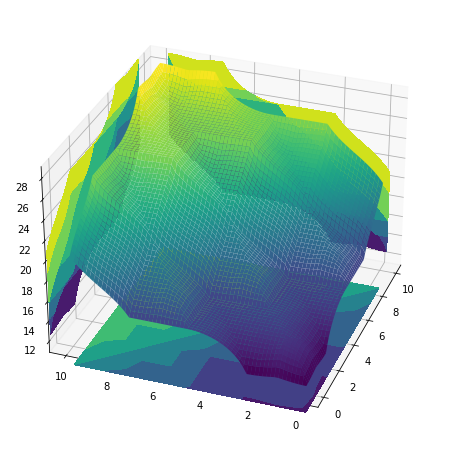

In [3]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
universe = np.linspace(0, 10, 61)
universe1 = np.linspace(10, 30, 61)
food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
#output
tip = ctrl.Consequent(universe1, 'tip')

names_food = ['VP', 'P', 'AV', 'G', 'VG']
names_service = ['VP', 'P', 'AV', 'G', 'VG']
names_tip = ['VP', 'P', 'AV', 'G', 'VG']


food.automf(names = names_food)
service.automf(names = names_service)
tip.automf(names = names_tip)
rule0 = ctrl.Rule(antecedent=((food['VP']&service['VP'])|(food['P']&service['VP'])|(food['VP']&service['P'])),consequent=tip['VP'],label= 'ruleVP')
rule1 = ctrl.Rule(antecedent=((food['G']&service['VP'])|(food['AV']&service['VP'])|(food['AV']&service['P'])|(food['P']&service['P'])|(food['P']&service['AV'])|(food['VP']&service['AV'])|(food['VP']&service['G'])),consequent=tip['P'],label= 'ruleP')
rule2 = ctrl.Rule(antecedent=((food['VG']&service['VP'])|(food['G']&service['P'])|(food['AV']&service['AV'])|(food['P']&service['G'])|(food['VP']&service['VG'])),consequent=tip['AV'],label= 'ruleAV')
rule3 = ctrl.Rule(antecedent=((food['VG']&service['P'])|(food['VG']&service['AV'])|(food['G']&service['AV'])|(food['G']&service['G'])|(food['AV']&service['G'])|(food['AV']&service['VG'])|(food['P']&service['VG'])),consequent=tip['G'],label= 'ruleG')
rule4 = ctrl.Rule(antecedent=((food['VG']&service['G'])|(food['VG']&service['VG'])|(food['G']&service['VG'])),consequent=tip['VG'],label= 'ruleVG')
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run= 61*61+1)



upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food']= x[i,j]
    sim.input['service']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['tip']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)


In [ ]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input for camera
universe = np.linspace(0.2, 2, 61)
universe1 = np.linspace(0, 100, 61)
sensor1 = ctrl.Antecedent(universe, 'sensor1')
sensor2 = ctrl.Antecedent(universe, 'sensor2')
sensor3 = ctrl.Antecedent(universe, 'sensor3')
#output
wheel1 = ctrl.Consequent(universe1, 'wheel1')
wheel2 = ctrl.Consequent(universe1, 'wheel2')


names_sensor1 = ['VC', 'C', 'F']
names_sensor2 = ['VC', 'C', 'F']
names_sensor3 = ['VC', 'C', 'F']
names_wheel1 = ['0','50','100']
names_wheel2 = ['0', '50', '100']


food.automf(names = names_food)
service.automf(names = names_service)
tip.automf(names = names_tip)
rule0 = ctrl.Rule(antecedent=((food['VP']&service['VP'])|(food['P']&service['VP'])|(food['VP']&service['P'])),consequent=tip['VP'],label= 'ruleVP')
rule1 = ctrl.Rule(antecedent=((food['G']&service['VP'])|(food['AV']&service['VP'])|(food['AV']&service['P'])|(food['P']&service['P'])|(food['P']&service['AV'])|(food['VP']&service['AV'])|(food['VP']&service['G'])),consequent=tip['P'],label= 'ruleP')
rule2 = ctrl.Rule(antecedent=((food['VG']&service['VP'])|(food['G']&service['P'])|(food['AV']&service['AV'])|(food['P']&service['G'])|(food['VP']&service['VG'])),consequent=tip['AV'],label= 'ruleAV')
rule3 = ctrl.Rule(antecedent=((food['VG']&service['P'])|(food['VG']&service['AV'])|(food['G']&service['AV'])|(food['G']&service['G'])|(food['AV']&service['G'])|(food['AV']&service['VG'])|(food['P']&service['VG'])),consequent=tip['G'],label= 'ruleG')
rule4 = ctrl.Rule(antecedent=((food['VG']&service['G'])|(food['VG']&service['VG'])|(food['G']&service['VG'])),consequent=tip['VG'],label= 'ruleVG')
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run= 61*61+1)
upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food']= x[i,j]
    sim.input['service']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['tip']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)


<ipython-input-21-686ce675047a>:46: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-21-686ce675047a>:47: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-21-686ce675047a>:48: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


Error in callback <function flush_figures at 0x7f03d2970f70> (for post_execute):


KeyboardInterrupt: ignored

<ipython-input-33-11c9f454c90c>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=-45,cmap='viridis',anpha=0.3)
<ipython-input-33-11c9f454c90c>:79: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=55,cmap='viridis',anpha=0.3)
<ipython-input-33-11c9f454c90c>:80: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=55,cmap='viridis',anpha=0.3)


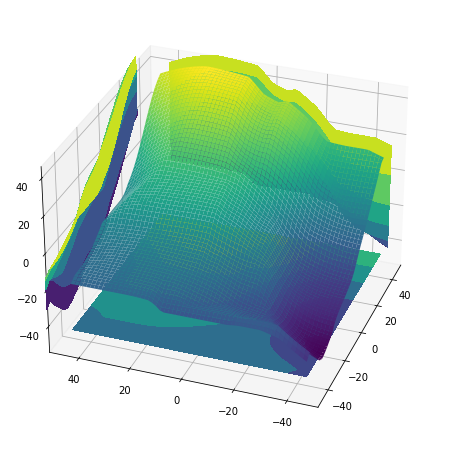

In [ ]:
#Control DC motor using PID
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math

alpha = ctrl.Antecedent(np.linspace(-90, 90, 61), 'alpha')
trend = ctrl.Antecedent(np.linspace(-45, 45, 61), 'trend')
force = ctrl.Consequent(np.linspace(-100, 100, 61), 'force')
#------------------#
alpha['LN'] = fuzz.gaussmf(alpha.universe,-90, 30)
alpha['N'] = fuzz.gaussmf(alpha.universe, -10, 20)
alpha['ZE'] = fuzz.gaussmf(alpha.universe, 0, 10)
alpha['P'] = fuzz.gaussmf(alpha.universe, 30, 30)
alpha['LP'] = fuzz.gaussmf(alpha.universe, 80, 20)
#------------------#
trend['-2'] = fuzz.gaussmf(trend.universe,-45, 30)
trend['-1'] = fuzz.gaussmf(trend.universe, -5, 10)
trend['0'] = fuzz.gaussmf(trend.universe, 0, 5)
trend['1'] = fuzz.gaussmf(trend.universe, 15, 20)
trend['2'] = fuzz.gaussmf(trend.universe, 40, 45)
#------------------#
force['LN'] = fuzz.gaussmf(force.universe,-100, 30)
force['N'] = fuzz.gaussmf(force.universe, -30, 30)
force['ZE'] = fuzz.gaussmf(force.universe, 0, 20)
force['P'] = fuzz.gaussmf(force.universe, 30, 25)
force['LP'] = fuzz.gaussmf(force.universe, 80, 30)

rule_1 = ctrl.Rule(alpha['LN'] & trend['-2'], force['LN'])
rule_2 = ctrl.Rule(alpha['LN'] & trend['-1'], force['LN'])
rule_3 = ctrl.Rule(alpha['LN'] & trend['0'], force['N'])
rule_4 = ctrl.Rule(alpha['LN'] & trend['1'], force['N'])
rule_5 = ctrl.Rule(alpha['LN'] & trend['2'], force['ZE'])

rule_6 = ctrl.Rule(alpha['N'] & trend['-2'], force['LN'])
rule_7 = ctrl.Rule(alpha['N'] & trend['-1'], force['N'])
rule_8 = ctrl.Rule(alpha['N'] & trend['0'], force['ZE'])
rule_9 = ctrl.Rule(alpha['N'] & trend['1'], force['ZE'])
rule_10 = ctrl.Rule(alpha['N'] & trend['2'], force['N'])

rule_11 = ctrl.Rule(alpha['ZE'] & trend['-2'], force['N'])
rule_12 = ctrl.Rule(alpha['ZE'] & trend['-1'], force['N'])
rule_13 = ctrl.Rule(alpha['ZE'] & trend['0'], force['ZE'])
rule_14 = ctrl.Rule(alpha['ZE'] & trend['1'], force['P'])
rule_15 = ctrl.Rule(alpha['ZE'] & trend['2'], force['N'])

rule_16 = ctrl.Rule(alpha['P'] & trend['-2'], force['ZE'])
rule_17 = ctrl.Rule(alpha['P'] & trend['-1'], force['P'])
rule_18 = ctrl.Rule(alpha['P'] & trend['0'], force['ZE'])
rule_19 = ctrl.Rule(alpha['P'] & trend['1'], force['P'])
rule_20 = ctrl.Rule(alpha['P'] & trend['1'], force['LP'])

rule_21 = ctrl.Rule(alpha['LP'] & trend['-2'], force['ZE'])
rule_22 = ctrl.Rule(alpha['LP'] & trend['-1'], force['P'])
rule_23 = ctrl.Rule(alpha['LP'] & trend['0'], force['ZE'])
rule_24 = ctrl.Rule(alpha['LP'] & trend['1'], force['P'])
rule_25 = ctrl.Rule(alpha['LP'] & trend['2'], force['LP'])



rules = [rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9, rule_10, rule_11, rule_12, rule_13, rule_14, rule_15, rule_16, rule_17, rule_18, rule_19, rule_20, rule_21, rule_22, rule_23, rule_24, rule_25]
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system,flush_after_run= 61*61+1)
upsampled = np.linspace(-45,45,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['alpha']= x[i,j]
    sim.input['trend']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['force']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4)
cset = ax.contourf(x,y,z,zdir='z',offset=-45,cmap='viridis',anpha=0.3)
cset = ax.contourf(x,y,z,zdir='x',offset=55,cmap='viridis',anpha=0.3)
cset = ax.contourf(x,y,z,zdir='y',offset=55,cmap='viridis',anpha=0.3)
ax.view_init(30,200)